In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
import pandas as pd
import numpy as np

In [3]:
ped_df = pd.read_csv("pheno.ped", sep='\t')

In [4]:
len(ped_df)

195

In [5]:
ped_df.head()

,familyId,personId,dadId,momId,sex,status,role
0,f1,f1.dad,0,0,1,1,dad
1,f1,f1.mom,0,0,2,1,mom
2,f1,f1.s1,f1.dad,f1.mom,2,1,sib
3,f1,f1.p1,f1.dad,f1.mom,1,2,prb
4,f1,f1.s2,f1.dad,f1.mom,2,2,sib


## Age at assesment

In [6]:
40*12

480

In [7]:
5*12

60

In [8]:
12*12

144

In [9]:
3*12

36

In [10]:
i1_age = pd.Series(np.random.normal(480, 60, len(ped_df)), index=ped_df.index)

In [11]:
index = (ped_df.role == 'prb') | (ped_df.role == 'sib')

In [12]:
i1_age[index] = np.random.normal(144, 36, len(ped_df[index]))

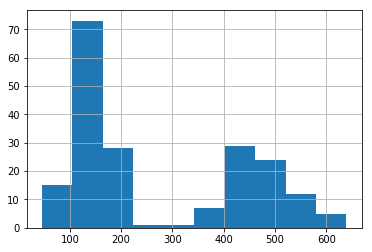

In [13]:
i1_age.hist()

In [14]:
i1_age.min()

45.77738160258474

In [15]:
i1_age.max()

638.915002951367

In [16]:
603/12

50.25

## IQ

In [17]:
i1_iq = pd.Series(np.random.normal(100, 30, len(ped_df)), index=ped_df.index)

In [18]:
index = ped_df.status == 2

In [19]:
i1_iq[index] = np.random.normal(70, 40, len(ped_df[index]))

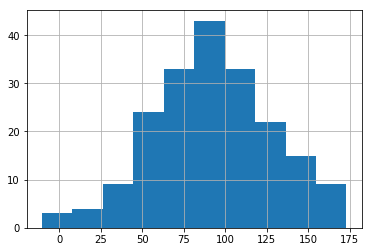

In [20]:
i1_iq.hist()

## Other measures

In [21]:
i1_m1 = pd.Series(np.random.normal(80,20, len(ped_df)), ped_df.index)

In [22]:
i1_m1.head()

0     68.526095
1     52.234468
2    101.095017
3     34.762858
4    110.824562
dtype: float64

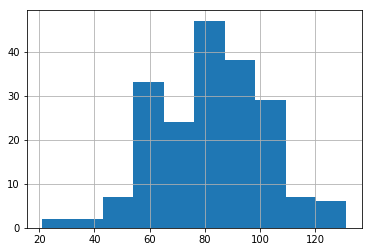

In [23]:
i1_m1.hist()

In [24]:
i1_m2 = pd.Series(np.random.normal(40,10, len(ped_df)), ped_df.index)

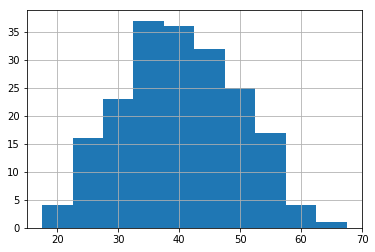

In [25]:
i1_m2.hist()

In [26]:
i1_m3 = pd.Series(np.random.normal(80,20, len(ped_df)), ped_df.index)

In [27]:
index = ped_df.status==2
len(index)

195

In [28]:
len(ped_df[index])

66

In [29]:
i1_m3[index] = np.random.normal(40, 5, len(ped_df[index]))

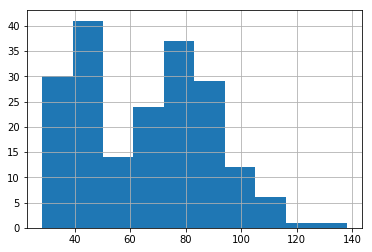

In [30]:
i1_m3.hist()

In [31]:
i1_m4 = pd.Series(np.random.poisson(2, len(ped_df)), index=ped_df.index)
i1_m4[index] = np.random.poisson(1,len(ped_df[index]))

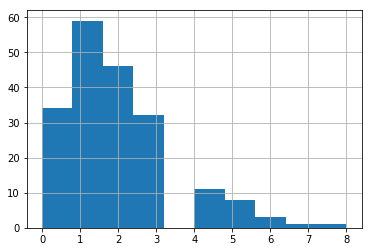

In [32]:
i1_m4.hist()

In [33]:
i1_m5 = pd.Series(np.random.choice(['catA', 'catB', 'catC', 'catD', 'catF'], size=len(ped_df)))

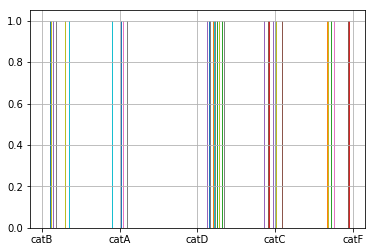

In [34]:
i1_m5.hist()

In [35]:
i1_m6 = pd.Series([np.NaN * len(ped_df)])

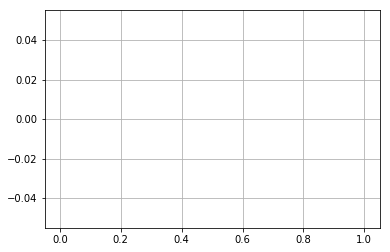

In [36]:
i1_m6.hist()

In [37]:
# Continuous measure with non-numeric values below non-numeric cutoff (6%, ~11 values)
cutoff = 0.06
i1_m7 = pd.Series(np.random.normal(80,20, len(ped_df)), ped_df.index)
non_numeric_values = pd.Series(np.random.choice(['valA', 'valB', 'valC', 'valD', 'valF'], size=len(ped_df)))
mask = np.random.randint(0, len(ped_df), size=int(cutoff * len(ped_df)))
i1_m7[mask] = non_numeric_values[mask]

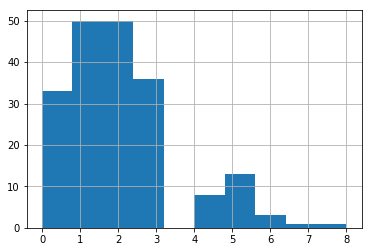

In [38]:
# Ordinal measure with non-numeric values below non-numeric cutoff (6%, ~11 values)
cutoff = 0.06
i1_m8 = pd.Series(np.random.poisson(2, len(ped_df)), index=ped_df.index)
i1_m8.hist()
i1_m8[index] = np.random.poisson(1,len(ped_df[index]))
non_numeric_values = pd.Series(np.random.choice(['valA', 'valB', 'valC', 'valD', 'valF'], size=len(ped_df)))
mask = np.random.randint(0, len(ped_df), size=int(cutoff * len(ped_df)))
i1_m8[mask] = non_numeric_values[mask]

In [39]:
# Continuous measure with non-numeric values above non-numeric cutoff (50%, ~97 values)
cutoff = 0.5
i1_m9 = pd.Series(np.random.normal(80,20, len(ped_df)), ped_df.index)
non_numeric_values = pd.Series(np.random.choice(['valA', 'valB', 'valC', 'valD', 'valF'], size=len(ped_df)))
mask = np.random.randint(0, len(ped_df), size=int(cutoff * len(ped_df)))
i1_m9[mask] = non_numeric_values[mask]

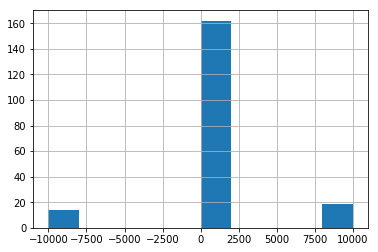

In [40]:
# Continuous measure with odd values of large sizes (20%, ~38 values) to be used in filtering
percent = 0.2
i1_m10 = pd.Series(np.random.normal(80,20, len(ped_df)), ped_df.index)
non_numeric_values = pd.Series(np.random.choice([9999, -9999], size=len(ped_df)))
mask = np.random.randint(0, len(ped_df), size=int(percent * len(ped_df)))
i1_m10[mask] = non_numeric_values[mask]
i1_m10.hist()

## Full instrument

In [41]:
i1_df = pd.DataFrame(index=ped_df.index)

In [42]:
i1_df['personId'] = ped_df['personId']

In [43]:
i1_df['age'] = i1_age
i1_df['iq'] = i1_iq
i1_df['m1'] = i1_m1
i1_df['m2'] = i1_m2
i1_df['m3'] = i1_m3
i1_df['m4'] = i1_m4
i1_df['m5'] = i1_m5
i1_df['m6'] = i1_m6
i1_df['m7'] = i1_m7
i1_df['m8'] = i1_m8
i1_df['m9'] = i1_m9
i1_df['m10'] = i1_m10

In [44]:
i1_df.head()

,personId,age,iq,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10
0,f1.dad,478.378521,172.917545,68.526095,40.311004,78.028997,0,catB,NaN,61.9421,0,valC,73.749628
1,f1.mom,513.883628,66.633781,52.234468,36.155647,89.747370,2,catA,NaN,68.7815,2,valA,-9999.000000
2,f1.s1,134.723860,98.217098,101.095017,34.350332,84.456329,2,catB,NaN,84.0692,2,31.4879,67.781935
3,f1.p1,125.906051,86.408676,34.762858,48.446444,49.836082,0,catB,NaN,79.1503,1,61.3154,84.666253
4,f1.s2,114.137627,32.724621,110.824562,44.066579,37.242210,2,catD,NaN,62.3244,1,valB,59.195742


In [45]:
i1_df.to_csv("instruments/i1.csv", index=False)